<a href="https://colab.research.google.com/github/Abhi-4793/Data_handling-IMS/blob/main/pr0ject_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
data = "diabetes_data.csv"

In [5]:
df = pd.read_csv(data, sep = ";")
display(df)       

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [7]:
df.loc[df["gender"] == "Male", ["gender"]] = 1
df.loc[df["gender"] == "Female", ["gender"]] = 0
df["gender"] = pd.to_numeric(df["gender"], downcast="integer")
display(df)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int8 
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

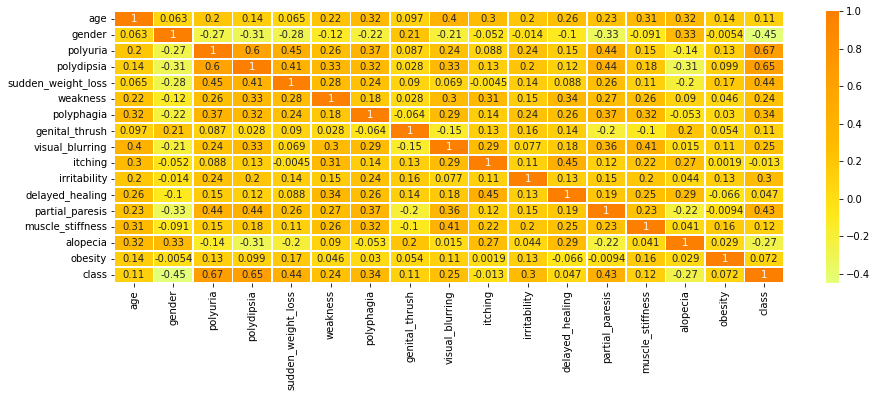

In [9]:
plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), cmap = "Wistia", annot = True, linewidths = .5)
plt.show()

In [10]:
drops = ["gender", "itching", "delayed_healing", "alopecia", "obesity"]
for item in drops:
    df = df.drop(f"{item}", axis = 1)
    
display(df)

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,irritability,partial_paresis,muscle_stiffness,class
0,40,0,1,0,1,0,0,0,0,0,1,1
1,58,0,0,0,1,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,0,0,1,1
3,45,0,0,1,1,1,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,0,1,0,1
516,48,1,1,1,1,1,0,0,1,1,0,1
517,58,1,1,1,1,1,0,1,0,1,1,1
518,32,0,0,0,1,0,0,1,0,0,0,0


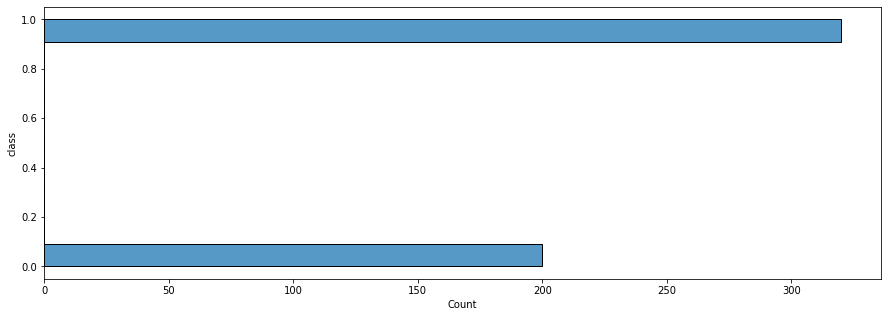

In [11]:
plt.figure(figsize = (15, 5))
sns.histplot(data = df, y = "class")
plt.show()

In [12]:
x = df.drop("class", axis = 1)
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [13]:
linear = LinearRegression()
linear.fit(x_train, y_train)

randomforest = RandomForestRegressor()
randomforest.fit(x_train, y_train)

RandomForestRegressor()

In [14]:
linear_test = linear.predict(x_test)
randomforest_test = randomforest.predict(x_test)

In [15]:
linear_r2 = metrics.r2_score(y_test, linear_test)
randomforest_r2 = metrics.r2_score(y_test, randomforest_test)

linear_error = metrics.mean_squared_error(y_test, linear_test)
randomforest_error = metrics.mean_squared_error(y_test, randomforest_test)

print(linear_r2, randomforest_r2)
print(linear_error, randomforest_error)

0.5280859470437027 0.850241446581121
0.11169563383581006 0.03544581146008973


In [16]:
comparison_df = pd.DataFrame()
comparison_df["Confirmed Diabetes"] = y_test
comparison_df["Predicted Diabetes"] = randomforest_test

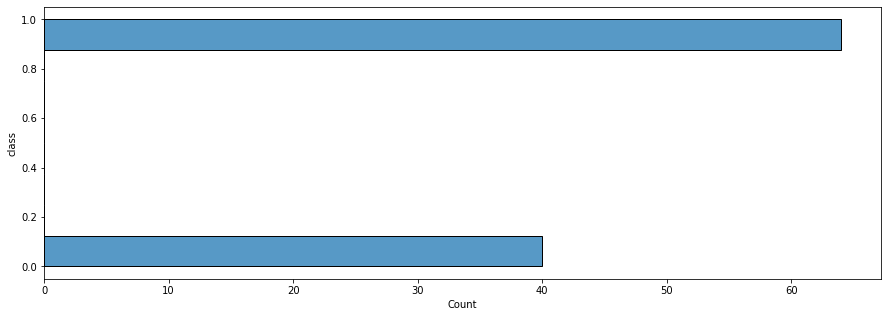

In [17]:
plt.figure(figsize = (15, 5))
sns.histplot(data = comparison_df, y = y_test)
plt.show()

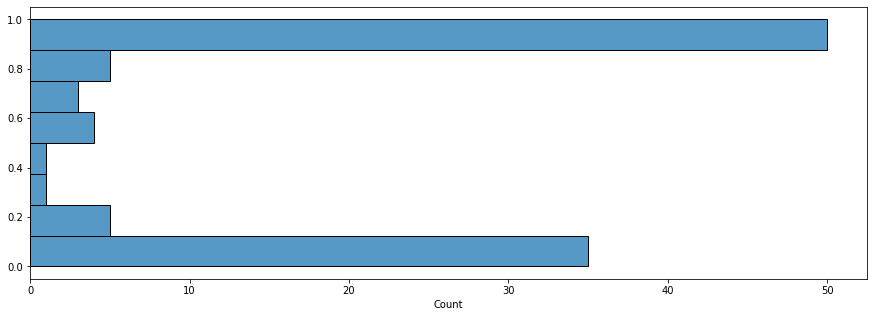

In [18]:
plt.figure(figsize = (15, 5))
sns.histplot(data = comparison_df, y = randomforest_test)
plt.show()